# Import Libraries and get data

# GROUP 10
### - Abhinav Merugu
### - Hamsaraj Tupthi
### - Anchit Raghuwanshi

In [17]:
from datetime import date
import io
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore") 
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_csv('global_sea_level_rise.csv')

 Removing null values and showing data information

In [18]:
df = df.fillna(df.bfill())
df.dropna()
print(df)

     Unnamed: 0  co2ppm  gmsl  gt_anomalies        date
0             0  356.37 -48.0          0.36  1993-01-01
1             1  356.40 -46.6          0.38  1993-02-01
2             2  356.51 -46.3          0.41  1993-03-01
3             3  356.66 -43.8          0.31  1993-04-01
4             4  356.72 -45.7          0.35  1993-05-01
..          ...     ...   ...           ...         ...
328         328  412.16  53.4          0.94  2020-05-01
329         329  412.30  54.0          0.92  2020-06-01
330         330  412.46  54.4          0.92  2020-07-01
331         331  412.56  53.7          0.94  2020-08-01
332         332  412.84  52.3          0.94  2020-09-01

[333 rows x 5 columns]


Manipulating data and showing information about it.

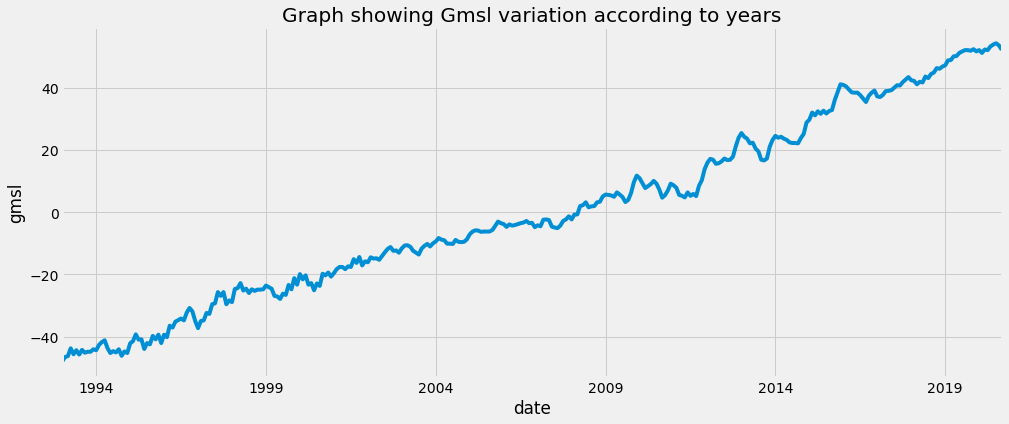

date
1993-01-01   -48.0
1993-02-01   -46.6
1993-03-01   -46.3
1993-04-01   -43.8
1993-05-01   -45.7
Freq: MS, Name: gmsl, dtype: float64


In [19]:
# Set the Date for index
df['date'] = pd.to_datetime(df['date'])
in2 = df.set_index('date')
# Extract gmsl value for each month
y = in2['gmsl'].resample('MS').mean()
y.head()
y.plot(figsize=(15, 6))
plt.title("Graph showing Gmsl variation according to years" )
plt.ylabel("gmsl")
plt.show()
df =  df.set_index('date').resample('MS').mean()
print(y.head())
plt.show()

# Creating a combaintion of p,d and q value for ARIMA

In [20]:

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
# p is the auto-regressive part of the model
# d is the integrated part of the model
# q is the moving average part of the model
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)


# Calculating SARIMA model value for different p, d, q and s value and selecting the model with lowest AIC score. Performing grid search.


In [21]:

warnings.filterwarnings("ignore") # specify to ignore warning messages


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print("ARIMA values -")
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.75651D+00    |proj g|=  1.89818D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   4.672D-06   4.757D+00
  F =   4.7565071014037477     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3169.833729534896
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91448D+00    |proj g|=  1.45413D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   1.454D-04   2.914D+00
  F =   2.9144787201968696     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA values -
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1945.0428276511152
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.69037D+00    |proj g|=  4.32072D-01

At iterate   10    f=  2.57068D+00    |proj g|=  1.35757D-01

At iterate   15    f=  2.51057D+00    |proj g|=  3.23434D-01

At iterate   20    f=  2.50823D+00    |proj g|=  6.66427D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   6.664D-06   2.508D+00
  F =   2.5082276669110404     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1676.479626162753
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71968D+00    |proj g|=  1.16921D+00

At iterate    5    f=  2.59326D+00    |proj g|=  8.22072D-02

At iterate   10    f=  2.54679D+00    |proj g|=  3.20624D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     12      1     0     0   3.206D-05   2.547D+00
  F =   2.5467915198819360     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA values -
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1700.1631522413693

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.56752D+00    |proj g|=  1.79491D-01

At iterate   20    f=  2.56204D+00    |proj g|=  2.36431D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     41      1     0     0   6.673D-06   2.562D+00
  F =   2.5620389669418171     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1712.3179519832502
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.32282D+00    |proj g|=  8.23868D-01

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  2.45877D+00    |proj g|=  7.80789D-02

At iterate   10    f=  2.41950D+00    |proj g|=  1.58587D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   4.140D-06   2.419D+00
  F =   2.4194978210275888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1617.3855488043741
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65511D+00    |proj g|=  1.20104D+00


 This problem is unconstrained.



At iterate   15    f=  2.24728D+00    |proj g|=  1.26788D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     32      1     0     0   4.343D-06   2.247D+00
  F =   2.2472390289482527     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1504.6611932795363
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76452D+00    |proj g|=  2.17672D-03
ARIMA values -
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1177.1716

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA values -
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1089.288102887991
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65697D+00    |proj g|=  5.45548D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.455D-06   1.657D+00
  F =   1.6569693709304938     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1107.541601039709
RUNNING THE L-BFGS-B CODE

           * * *

Machine p

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA values -
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1091.9599787959046
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83608D+00    |proj g|=  6.72511D-01

At iterate    5    f=  1.76028D+00    |proj g|=  5.19098D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   5.544D-08   1.760D+00
  F =   1.7602777359254547     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1176.3449

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA values -
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1081.2804521861085
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75138D+00    |proj g|=  7.42876D-01

At iterate    5    f=  1.65104D+00    |proj g|=  2.84421D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   1.147D-06   1.651D+00
  F =   1.6510403222920771     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1105.5928

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.61612D+00    |proj g|=  3.16690D-02

At iterate   10    f=  1.61519D+00    |proj g|=  1.42470D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     17      1     0     0   1.425D-05   1.615D+00
  F =   1.6151940734848926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA values -
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1083.7192529409385
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76975D+00    |proj g|=  1.99089D-03

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA values -
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1100.4986199506354
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84612D+00    |proj g|=  4.38746D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      4      1     0     0   3.864D-05   1.846D+00
  F =   1.8461226361513474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA values -
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1233.5176756767974
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  1.64325D+00    |proj g|=  8.26585D-02

At iterate   30    f=  1.64314D+00    |proj g|=  2.87003D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     42      1     0     0   8.088D-06   1.643D+00
  F =   1.6431380257610457     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1102.3299251568565
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94684D+00    |proj g|=  6.05986D-01

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.64127D+00    |proj g|=  1.58159D+00

At iterate   15    f=  1.63437D+00    |proj g|=  5.10528D-02

At iterate   20    f=  1.63318D+00    |proj g|=  2.60217D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     60      2     1     0   2.639D-05   1.633D+00
  F =   1.6331753415419059     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA values -
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1095.6947774669093
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76417D+00    |proj g|=  2.26431D-02

At iterate    5    f=  1.76417D+00    |proj g|=  2.26075D-02

At iterate   10    f=  1.76417D+00    |proj g|=  3.15976D-03

 This problem is unconstrained.



At iterate   15    f=  1.61984D+00    |proj g|=  2.77983D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     26      1     0     0   5.438D-05   1.620D+00
  F =   1.6197643615363677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA values -
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1086.763064783221
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88224D+00    |proj g|=  6.68032D-01

At iterate    5    f=  1.68888D+00    |proj g|=  4.81474D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.90098D+00    |proj g|=  7.81848D-01

At iterate   10    f=  1.65251D+00    |proj g|=  7.78173D-01

At iterate   15    f=  1.64338D+00    |proj g|=  1.67715D-01

At iterate   20    f=  1.64318D+00    |proj g|=  1.68291D-01

At iterate   25    f=  1.63986D+00    |proj g|=  8.62823D-01

At iterate   30    f=  1.63660D+00    |proj g|=  4.65497D-02

At iterate   35    f=  1.63607D+00    |proj g|=  2.77013D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     57      1     0     0   1.191D-03   1.636D+00
  F =   1.6360630011842656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93845D+00    |proj g|=  6.13157D-01

At iterate    5    f=  1.73173D+00    |proj g|=  5.68463D-02

At iterate   10    f=  1.72856D+00    |proj g|=  1.33083D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   1.625D-06   1.729D+00
  F =   1.7285594533407196     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1159.2205959249193
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA values -
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1078.860630413748
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65046D+00    |proj g|=  9.57884D-02

At iterate    5    f=  1.64018D+00    |proj g|=  5.70948D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.721D-06   1.640D+00
  F =   1.6401812030970251     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1098.36068

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.61133D+00    |proj g|=  2.33704D-02

At iterate   10    f=  1.61103D+00    |proj g|=  1.68523D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   3.902D-06   1.611D+00
  F =   1.6110254644847057     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1080.942959346814
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93812D+00    |proj g|=  9.43105D-01


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86806D+00    |proj g|=  1.82932D+00

At iterate    5    f=  1.69577D+00    |proj g|=  1.52030D-01

At iterate   10    f=  1.68459D+00    |proj g|=  5.72576D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   3.557D-05   1.685D+00
  F =   1.6845852987633911     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA values -
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1127.9338089764185

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.50967D+00    |proj g|=  1.86423D-03

At iterate   20    f=  1.50966D+00    |proj g|=  5.51064D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   1.347D-05   1.510D+00
  F =   1.5096638248144176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA values -
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1015.4361073264022
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76158D+00    |proj g|=  1.69842D+00

 This problem is unconstrained.



At iterate    5    f=  1.54575D+00    |proj g|=  1.13736D-01

At iterate   10    f=  1.49743D+00    |proj g|=  4.77148D-02

At iterate   15    f=  1.49317D+00    |proj g|=  1.02973D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   1.331D-06   1.493D+00
  F =   1.4930633418640664     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA values -
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1004.3801856814682


# Fitting an ARIMA Time Series Model

In [22]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
# Summary attribute that results from the output of SARIMA
print(results.summary().tables[1])

# The coef column shows the weight of each feature and how each one impacts the time series.
# The P>|z| column shows significance of each feature weight
# p-value for Each weight is lower or close to 0.1, so it is reasonable to retain all of them in our mode

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71900D+00    |proj g|=  1.59508D+00

At iterate    5    f=  1.54575D+00    |proj g|=  1.13736D-01

At iterate   10    f=  1.49743D+00    |proj g|=  4.77148D-02


 This problem is unconstrained.



At iterate   15    f=  1.49317D+00    |proj g|=  1.02973D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   1.331D-06   1.493D+00
  F =   1.4930633418640664     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9272      0.038    -24.681      0.000      -1.001      -0.854
ma.L1          1.4177      0.137     10.384      0.000       1.150       1.685
ar.S.L12       0.1268      0.078      1.628  

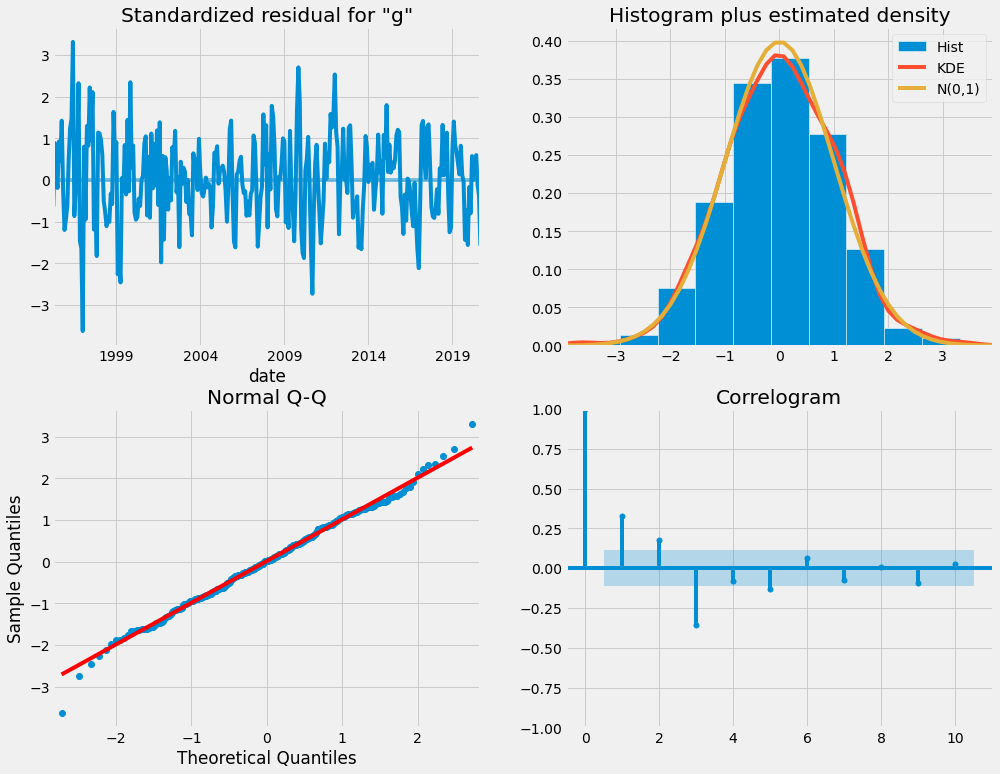

In [23]:
# Plot_diagnostics object quickly generates model diagnostics and investigate for any unusual behaviour
results.plot_diagnostics(figsize=(15, 12))
plt.show()
# Model diagnostics suggests that the model residuals are normally distributed

# Validating *Forecasts*

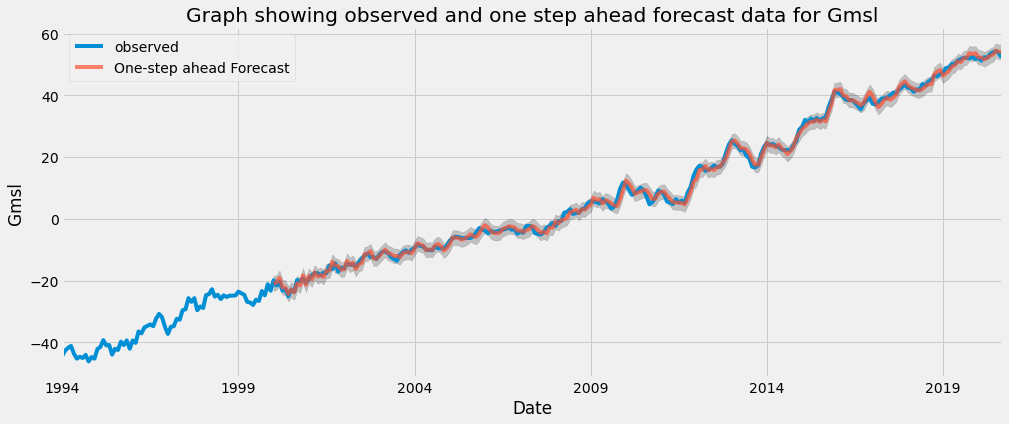

The Mean Squared Error of our forecasts is 1.2


In [24]:

pred = results.get_prediction(start=pd.to_datetime('2000-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1994':].plot(label='observed', figsize=(15, 6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
# dynamic=False argument produces one-step ahead forecasts, 
# meaning at each point, forecasts are generated using the full history up to that point
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Gmsl')
plt.legend()
plt.title("Graph showing observed and one step ahead forecast data for Gmsl")
plt.show()

y_forecasted = pred.predicted_mean
y_truth = y['2000-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Producing and Visualizing Forecasts

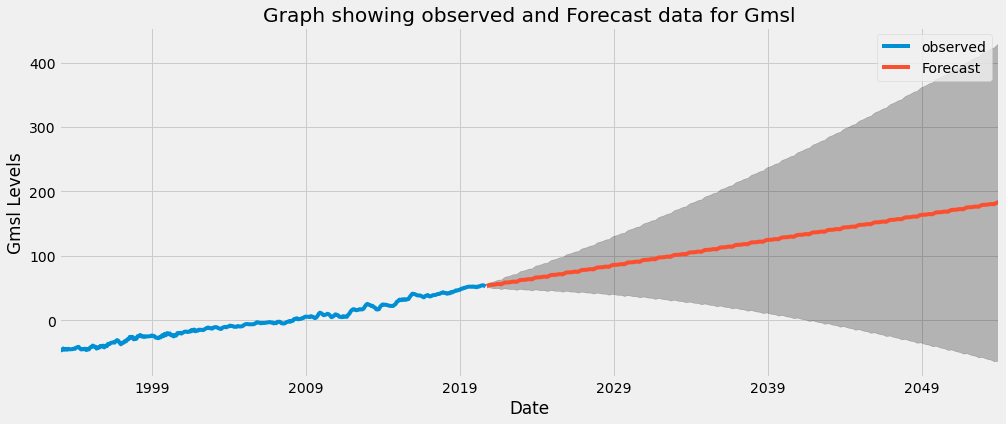

In [25]:

# Get forecast 400 steps ahead in future
pred_uc = results.get_forecast(steps=400)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(15, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Gmsl Levels')

plt.legend()
plt.subplots_adjust(hspace=.5)
plt.title("Graph showing observed and Forecast data for Gmsl")
plt.show()

Forecasts show that the time series is expected to continue increasing at a steady pace. As we move ahead into the future, model prediction will be less confident. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.